Student name: Feiyang Li

Student id: 23202564

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

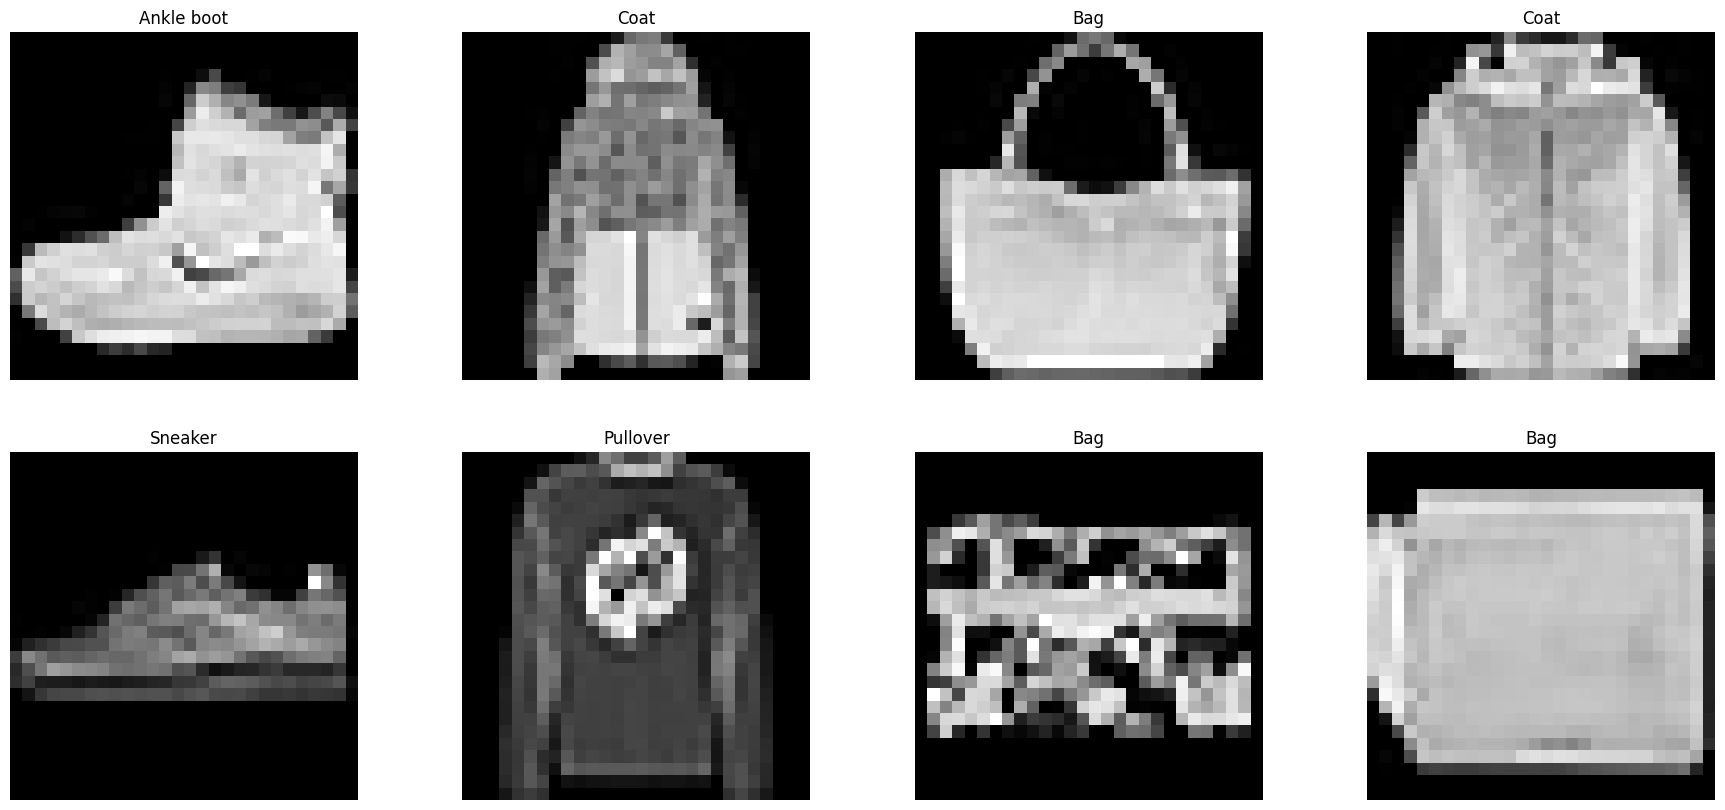

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.reshape(-1, 28 * 28)).reshape(-1, 28, 28)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.linear_model import Perceptron as Perceptron

X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

perceptron.fit(X_train_flat, y_train)

y_train_pred = perceptron.predict(X_train_flat)

y_test_pred = perceptron.predict(X_test_flat)

Training accuracy: 0.8365714285714285
Test accuracy: 0.8165714285714286


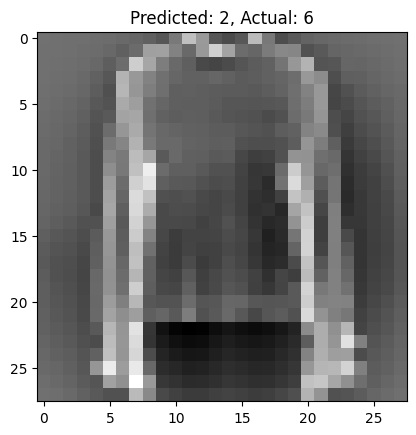

In [6]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

misclassified_indices = np.where(y_test != y_test_pred)[0]
if misclassified_indices.size > 0:
    first_misclassified = misclassified_indices[0]
    plt.imshow(X_test_scaled[first_misclassified], cmap='gray')
    plt.title(f"Predicted: {y_test_pred[first_misclassified]}, Actual: {y_test[first_misclassified]}")
    plt.show()
else:
    print("No misclassified samples found.")

+ For a simple perceptron model, the training accuracy is around 83.6%, and the test accuracy is about 81.6%, the results are good enough. Anyway there's still some room for improvement.
+ Label 6 was misclassified into Lable 2. Maybe it's due to low grey scale and resolution.
+ In conventional perceptrons, the output is usually binary. In contrast, a multi-category perceptron is able to distinguish between more than two categories by assigning a perceptron to each category, each of which is responsible for recognising its corresponding category.In multi-category perceptron, for each input instance, all the perceptrons are computed and evaluated, and each perceptron gives a value indicating the extent to which the instance belongs to the corresponding category. Eventually, the category represented by the perceptron with the highest value is selected as the prediction.
As an example, if we have a dataset about clothes where the categories include T-shirts, trousers and shoes, we will train three different perceptrons, each responsible for recognising one category. When a new image of clothes is input, each perceptron tries to categorise it into its corresponding category and finally the category with the highest output value is used as the prediction.  
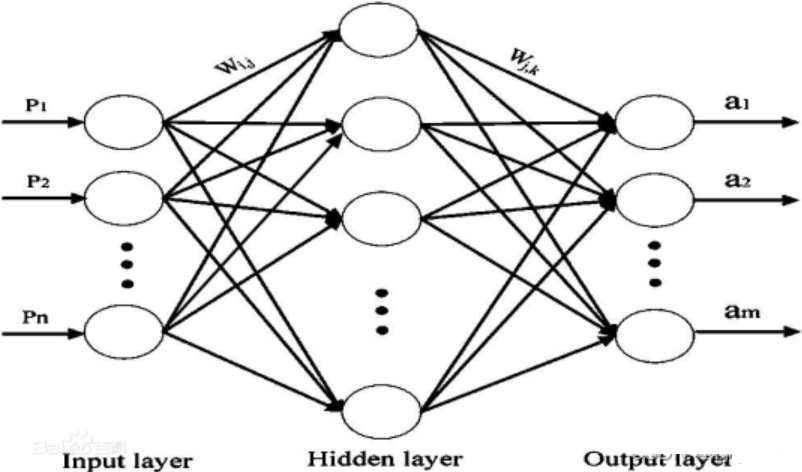

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [7]:
from sklearn.neural_network import MLPClassifier

X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

mlp = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, random_state=1, verbose=True)

mlp.fit(X_train_flat, y_train)

y_pred = mlp.predict(X_test_flat)



Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8697857142857143


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

1.   The size of the input layer corresponds to the number of features in the dataset. Since the Fashion MNIST dataset images are 28x28 pixels, the input layer has 784 neurons (28 multiplied by 28), one for each pixel.
2.   The output layer size is determined by the number of classes in the classification task. Fashion MNIST has 10 different clothing categories, so the output layer has 10 neurons, one for each class.  
3.   The algorithm learns weights for connections between the input layer and the hidden layer, and the hidden layer and the output layer.
4.   Different training and test accuracies usually means the model has learned the training data slightly differently than how it generalizes to new, unseen data. It can indicate overfitting if the training accuracy is higher than the test accuracy.



#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

a_test = []
a_train = []

widths = (20, 50, 100, 200)
a_test = []
a_train = []

widths = (20, 50, 100, 200)

for width in widths:
    mlp = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42)

    mlp.fit(X_train_flat, y_train)

    a_train.append(accuracy_score(y_train, mlp.predict(X_train_flat)))

    a_test.append(accuracy_score(y_test, mlp.predict(X_test_flat)))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


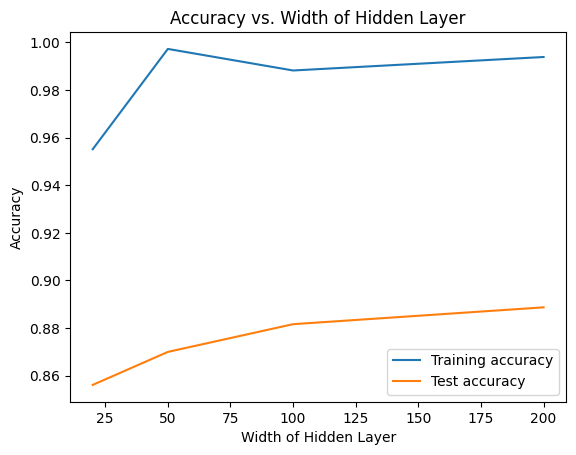

In [10]:
import matplotlib.pyplot as plt

plt.plot(widths, a_train, label='Training accuracy')
plt.plot(widths, a_test, label='Test accuracy')
plt.xlabel('Width of Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Width of Hidden Layer')
plt.legend()
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).



1. In general, as the width of the hidden layer increases, the training time also increases. This is because more neurons means more weights and biases need to be updated during each iteration of training. As a result, networks with a larger number of neurons usually take longer to train than networks with a smaller number of neurons.


2. optimal number of neurons As can be seen from the figure, the higher the number of test neurons, the higher the test accuracy seems to be, but the performance improvement is not significant compared to the increase in the number of neurons. Therefore, the optimal number of neurons should balance the performance, efficiency and complexity of the model in practical applications.


  
Weights in the optimal solution: The best solution based on the highest test accuracy will have the most neurons and therefore the largest weights. Each neuron in the hidden layer is connected to all input neurons, and each neuron in the output layer is connected to all hidden layer neurons, so the total number of weights is very important.


EVIDENCE OF OVERFITTING: As can be seen in the figure, there is a deviation between the training accuracy and the testing accuracy, with the training accuracy being higher. This deviation may indicate overfitting, i.e., the model learns well from the training data but does not generalise well to new unseen data. To reduce overfitting, techniques such as adding a culling layer, increasing data regularisation or acquiring more diverse training data can be used. Reducing the complexity of the model by choosing a simpler model or reducing the number of neurons would also help.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

In [11]:
layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

for layer in layers:
    mlp = MLPClassifier(hidden_layer_sizes=layer, alpha=0.001, random_state=42)

    mlp.fit(X_train_flat, y_train)

    a_train.append(accuracy_score(y_train, mlp.predict(X_train_flat)))

    a_test.append(accuracy_score(y_test, mlp.predict(X_test_flat)))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


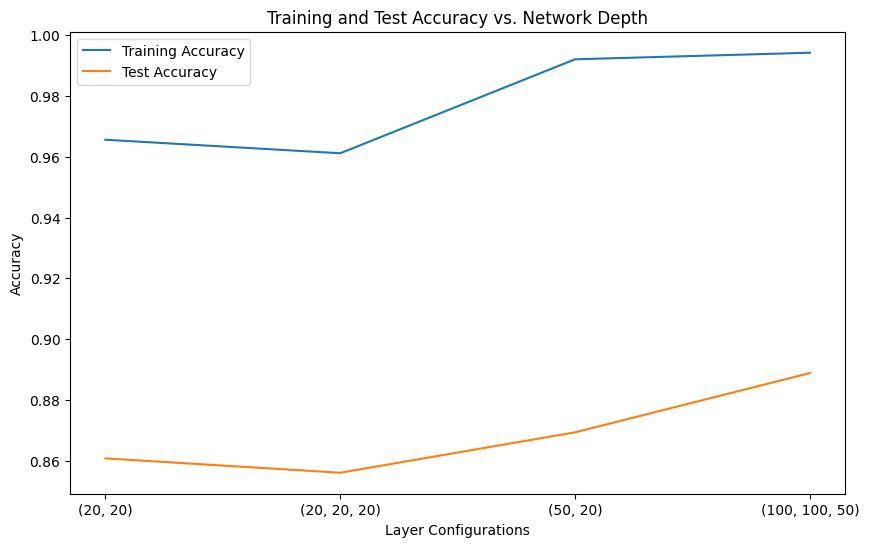

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([str(layer) for layer in layers], a_train, label='Training Accuracy')
plt.plot([str(layer) for layer in layers], a_test, label='Test Accuracy')
plt.xlabel('Layer Configurations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Network Depth')
plt.legend()
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?


It can be inferred from the figure that

Networks with deeper depth and fewer neurons perform better than networks with shallower depth and wider width. This shows that depth improves the learning ability of the network more than width.

The number of weights to be trained in a neural network is determined by the number of neurons in each layer and the connections between the neurons. For each layer, the number of weights is the number of neurons in the previous layer multiplied by the number of neurons in the current layer, plus the bias of each neuron. In the absence of an exact architecture, we cannot provide the exact number of weights, but deep networks with a small number of neurons may require fewer weights than very wide networks due to the small number of connections between layers.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.


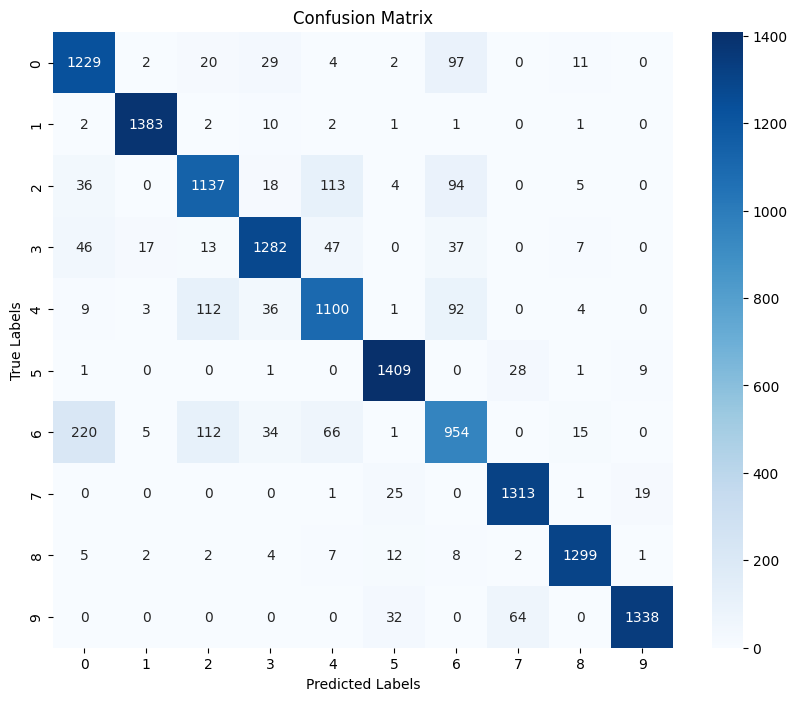

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_layer_size = (100, 100, 50)
best_mlp = MLPClassifier(hidden_layer_sizes=best_layer_size, alpha=0.001, random_state=42)
best_mlp.fit(X_train_flat, y_train)
y_pred = best_mlp.predict(X_test_flat)

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

1. Most of the predictions are centred on the diagonal, meaning that the model accurately predicts the true category in most cases.
2. The accuracy of the predictions for some categories is very high, for example labels 5 (line 6) and 7 (line 8) are particularly accurate, with most of their samples being correctly classified.
3. There is confusion in some categories, notably label 2 and label 6 (rows 3 and 7), which can be seen to be more confounded with other categories. For example, label 2 was misclassified as label 6 94 times, while label 6 was misclassified as label 2 112 times.
4. The model may have difficulty in recognising certain categories, which is usually due to the fact that these categories have similarities in features that cause the model to misclassify them as other categories.